# Author - Tanmay Bhopi

## GRIP @ The Sparks Foundation

## To explore Business Analytics

#### importing some important Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

##### Loading Dataset

In [2]:
df = pd.read_csv(r"data7.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


#### First 5 samples from our Dataset.

In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Cleaning the Data

#### Removing the country column

In [7]:
df = df.drop(["Country"] , axis = 1)

#### Checking null counts

In [8]:
pd.DataFrame(df.isnull().sum(),columns=['Number of missing values'])

,Number of missing values
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [9]:
df.duplicated()
df.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [10]:
df.duplicated().sum()

17

In [11]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
data = df.drop_duplicates(keep='first')

In [17]:
dt = df.sort_values(by='Sales',ascending=False)

In [18]:
dt.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


In [19]:
dt.shape

(9994, 12)

In [20]:
#pip install plotly
import plotly
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#pip install cufflinks
import cufflinks as cf##To bind plotly and pandas together.

In [23]:
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)#plotly connected to jupyter in ofline mode
cf.go_offline()

#### Using Barchart

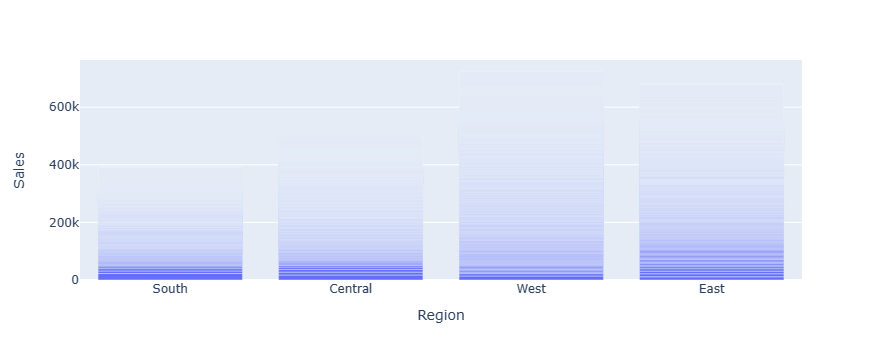

In [24]:
px.bar(dt,x='Region',y='Sales')

#### Calculating Z-Score Value

In [25]:
dt['z-score'] = (dt.Sales-dt.Sales.mean())/dt.Sales.std()

In [26]:
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [27]:
dt[dt['z-score']>3]
dt.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,15.504144
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,14.793685
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,14.232077
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,13.670532
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,13.108997


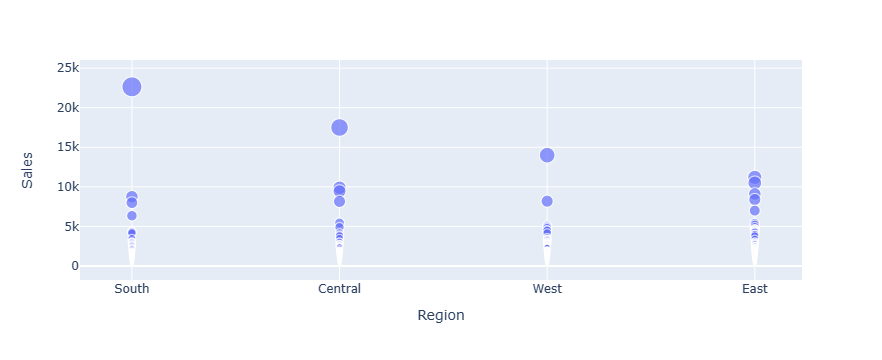

In [28]:
px.scatter(dt,x='Region',y='Sales',size='Sales')

In [32]:
dt['z-score'] = (dt.Sales-dt.Sales.mean())/dt.Sales.std()

In [33]:
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [34]:
dt[dt['z-score']>3]
dt.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,15.504144
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,14.793685
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,14.232077
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,13.670532
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,13.108997


In [35]:
dt.shape

(9994, 13)

In [36]:
dt[dt['z-score']<-3]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score


#### Removing Outliers From the Dataset.

In [37]:
dt_no_outliers = dt[dt['z-score']<3]

In [38]:
dt_no_outliers.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.967600
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.945008
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.937666
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.927282
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.899344


In [39]:
new_dt = dt_no_outliers

In [40]:
new_dt.shape

(9867, 13)

HERE ARE OUTLIERS OBSERVED IN OUR DATA. NOW OUR DATA IS CLEAN.

#### Scatter Plot BEFORE Removing Outliers.

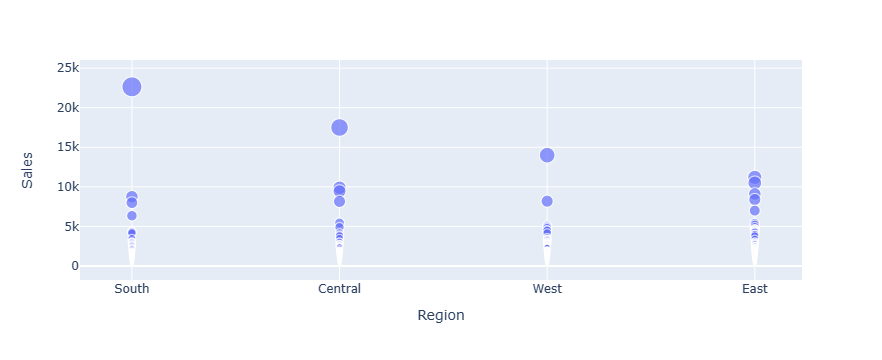

In [41]:
px.scatter(dt,x='Region',y='Sales',size='Sales')

#### Distribution Plots

C:\Users\TANMAY\AppData\Local\Temp\ipykernel_7032\540529512.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Sales', ylabel='Density'>

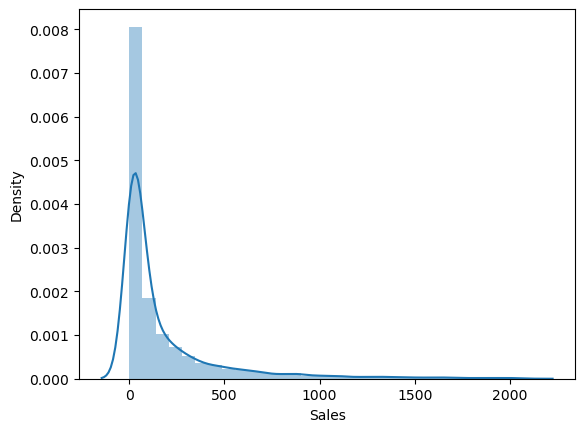

In [43]:
sns.distplot(new_dt['Sales'],bins=30)

C:\Users\TANMAY\AppData\Local\Temp\ipykernel_7032\4229245031.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Discount', ylabel='Density'>

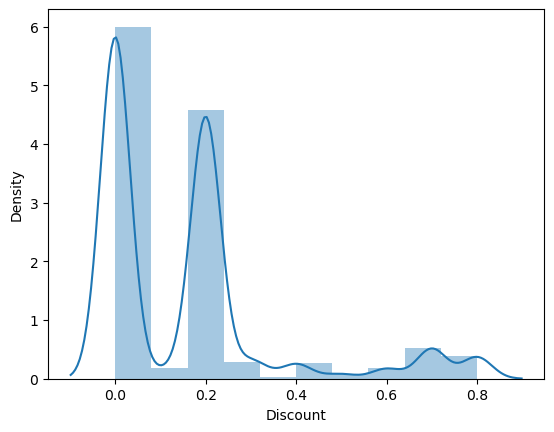

In [44]:
sns.distplot(new_dt['Discount'],bins=10)

In [45]:
new_dt = new_dt.drop(['z-score','Postal Code'],axis=1)

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



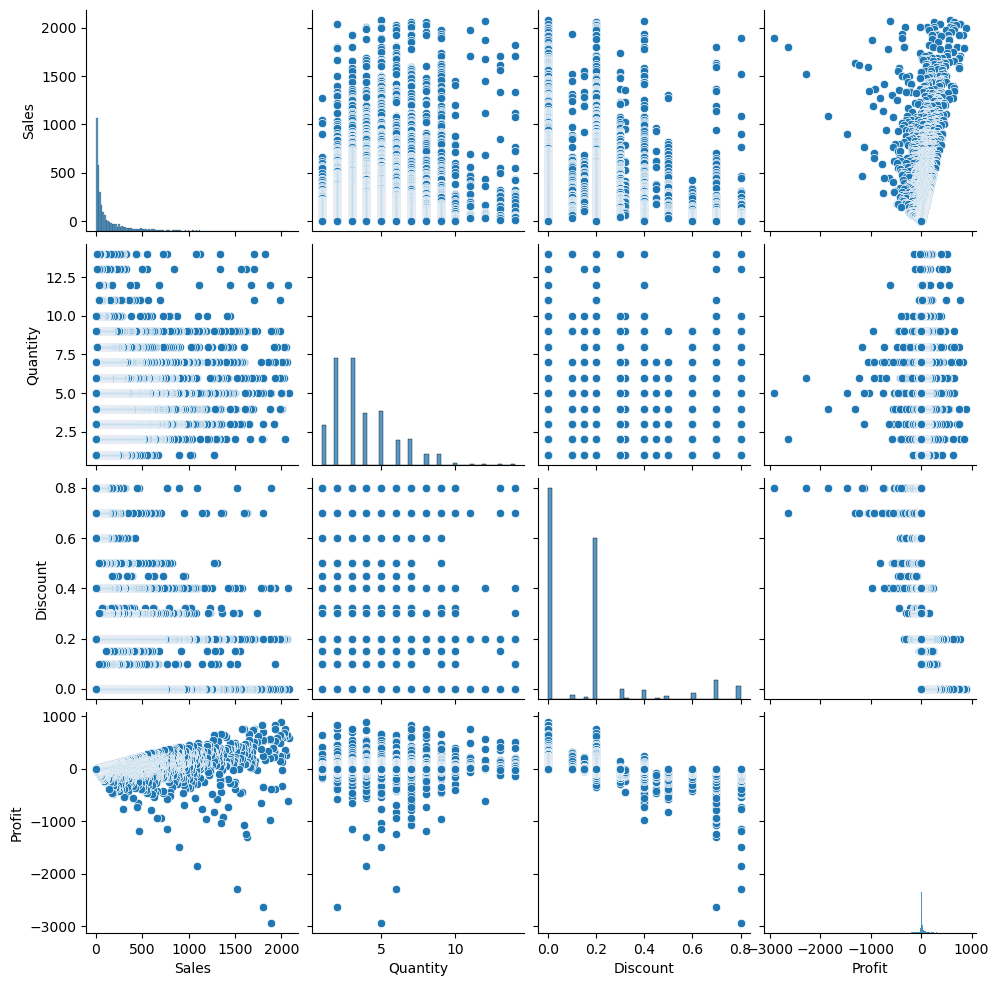

In [48]:
sns.pairplot(new_dt)

#### visualizing the data.

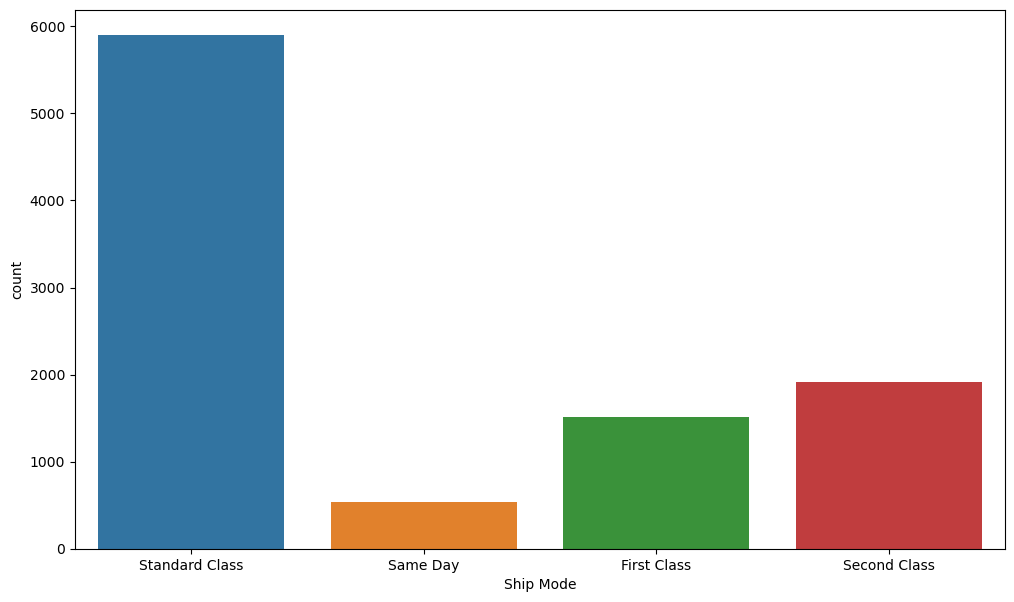

In [49]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Ship Mode"])
plt.show()


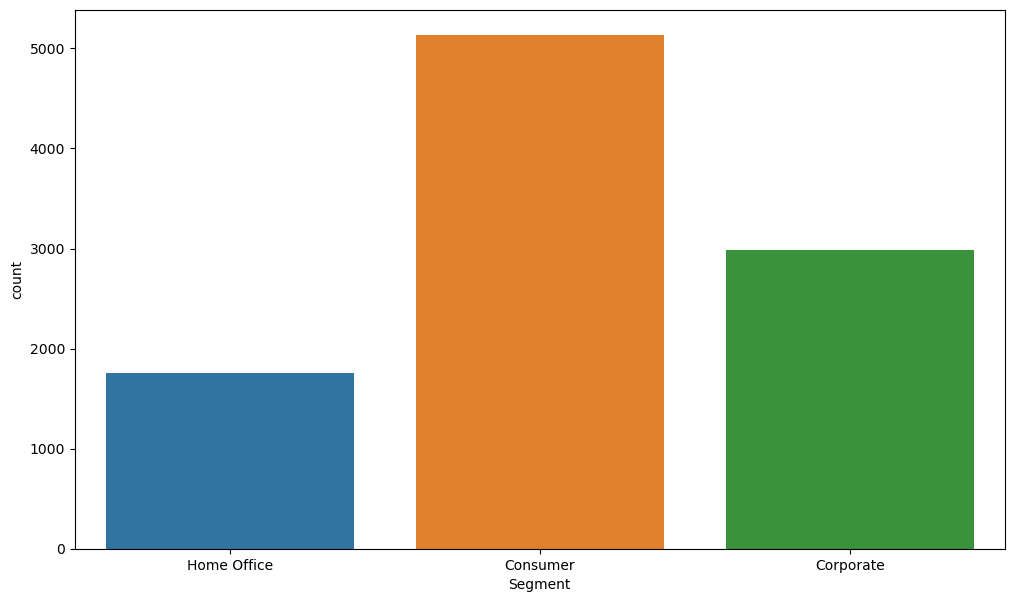

In [50]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Segment"])
plt.show()

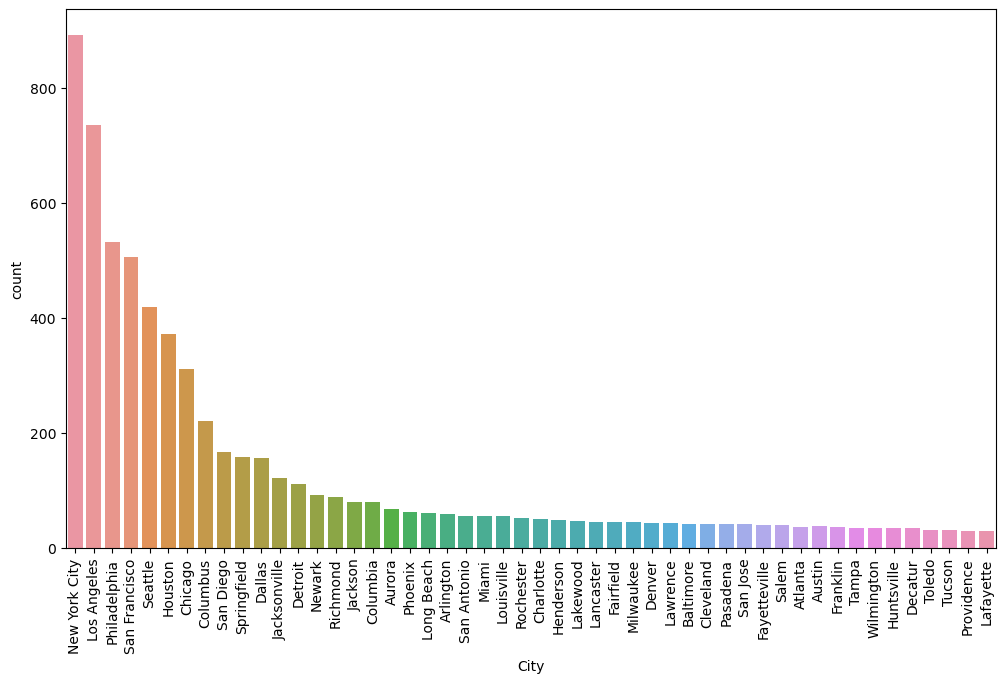

In [51]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["City"],order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

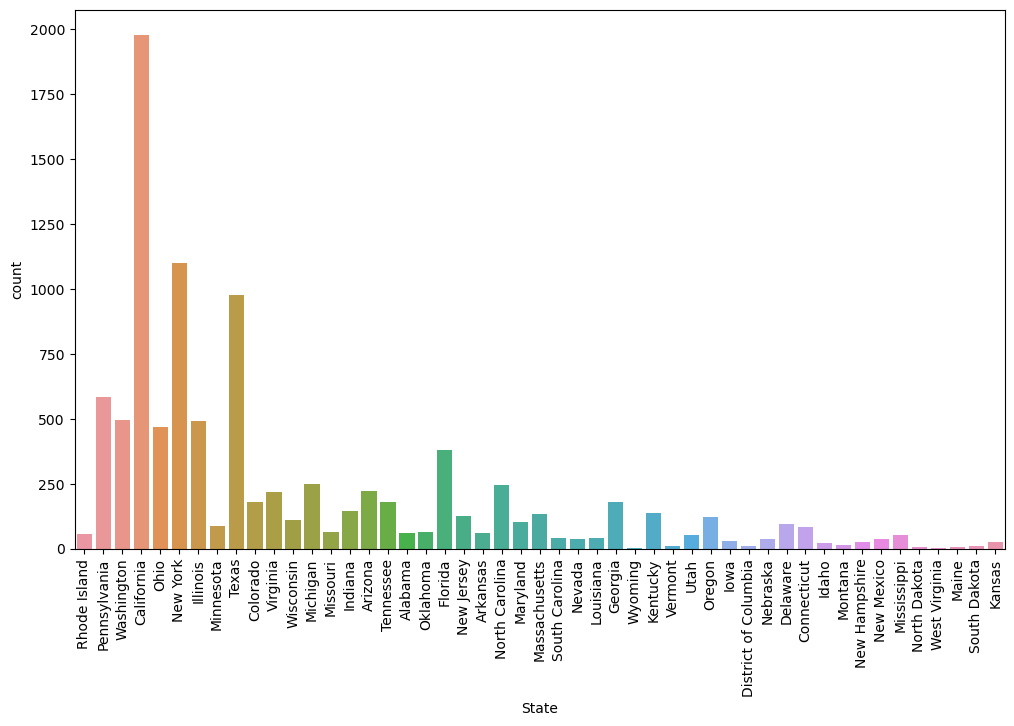

In [52]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["State"])
plt.xticks(rotation = 90)
plt.show()

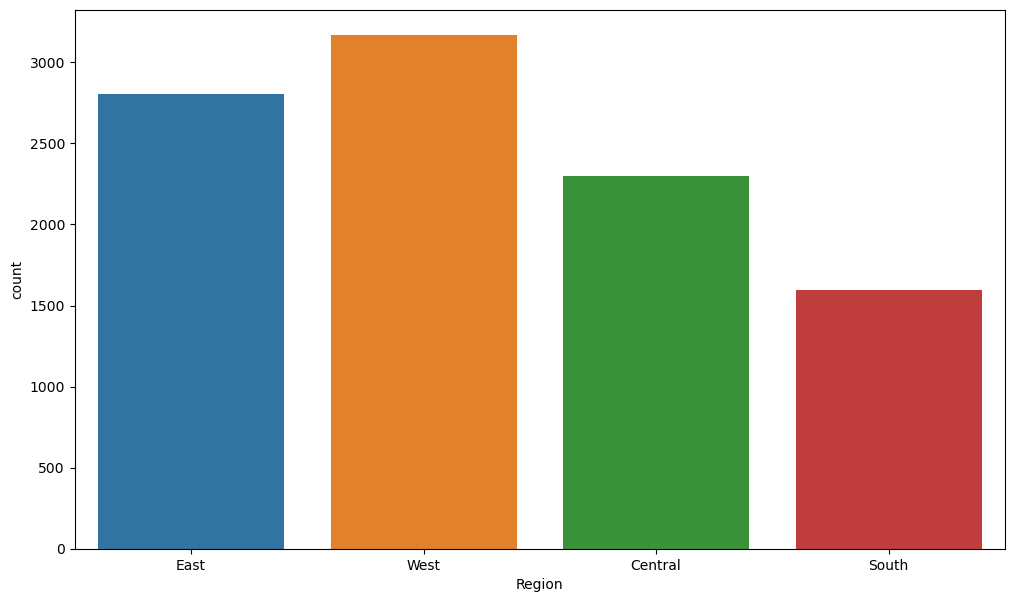

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Region"])
plt.show()

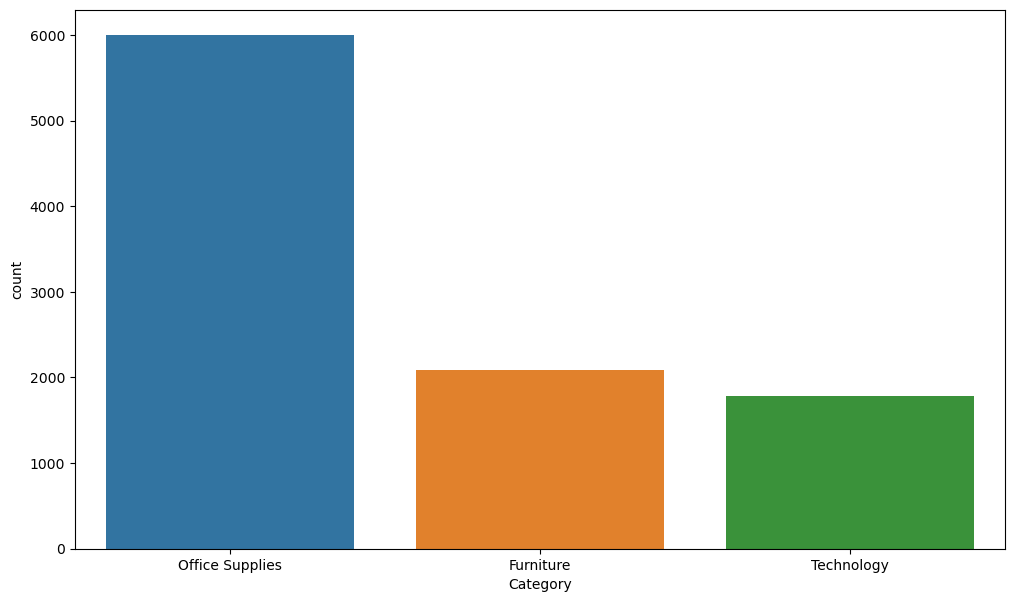

In [54]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Category"])
plt.show()

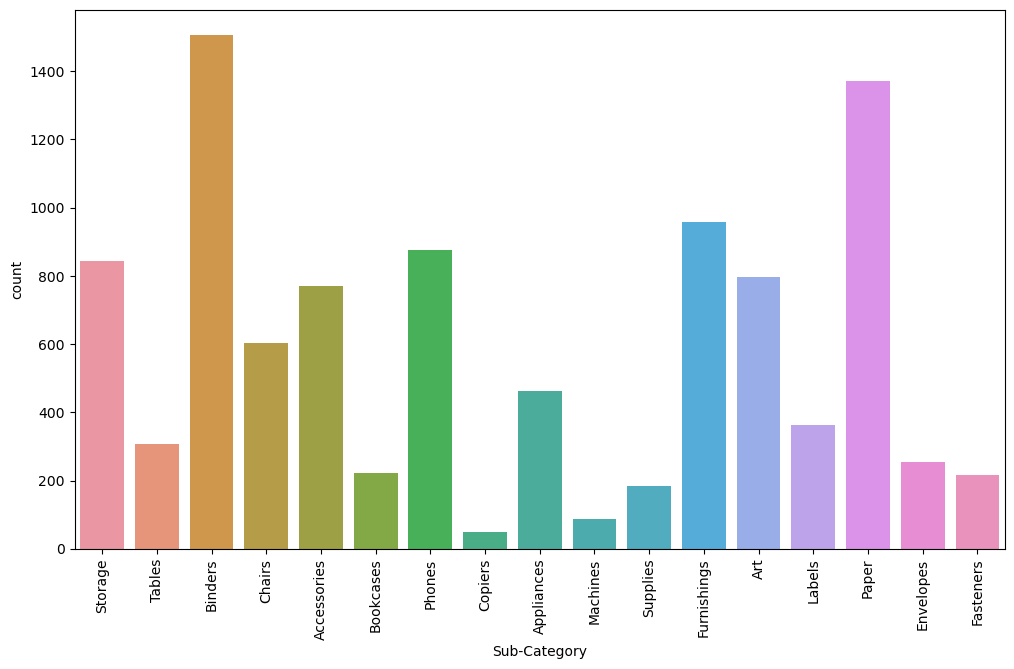

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

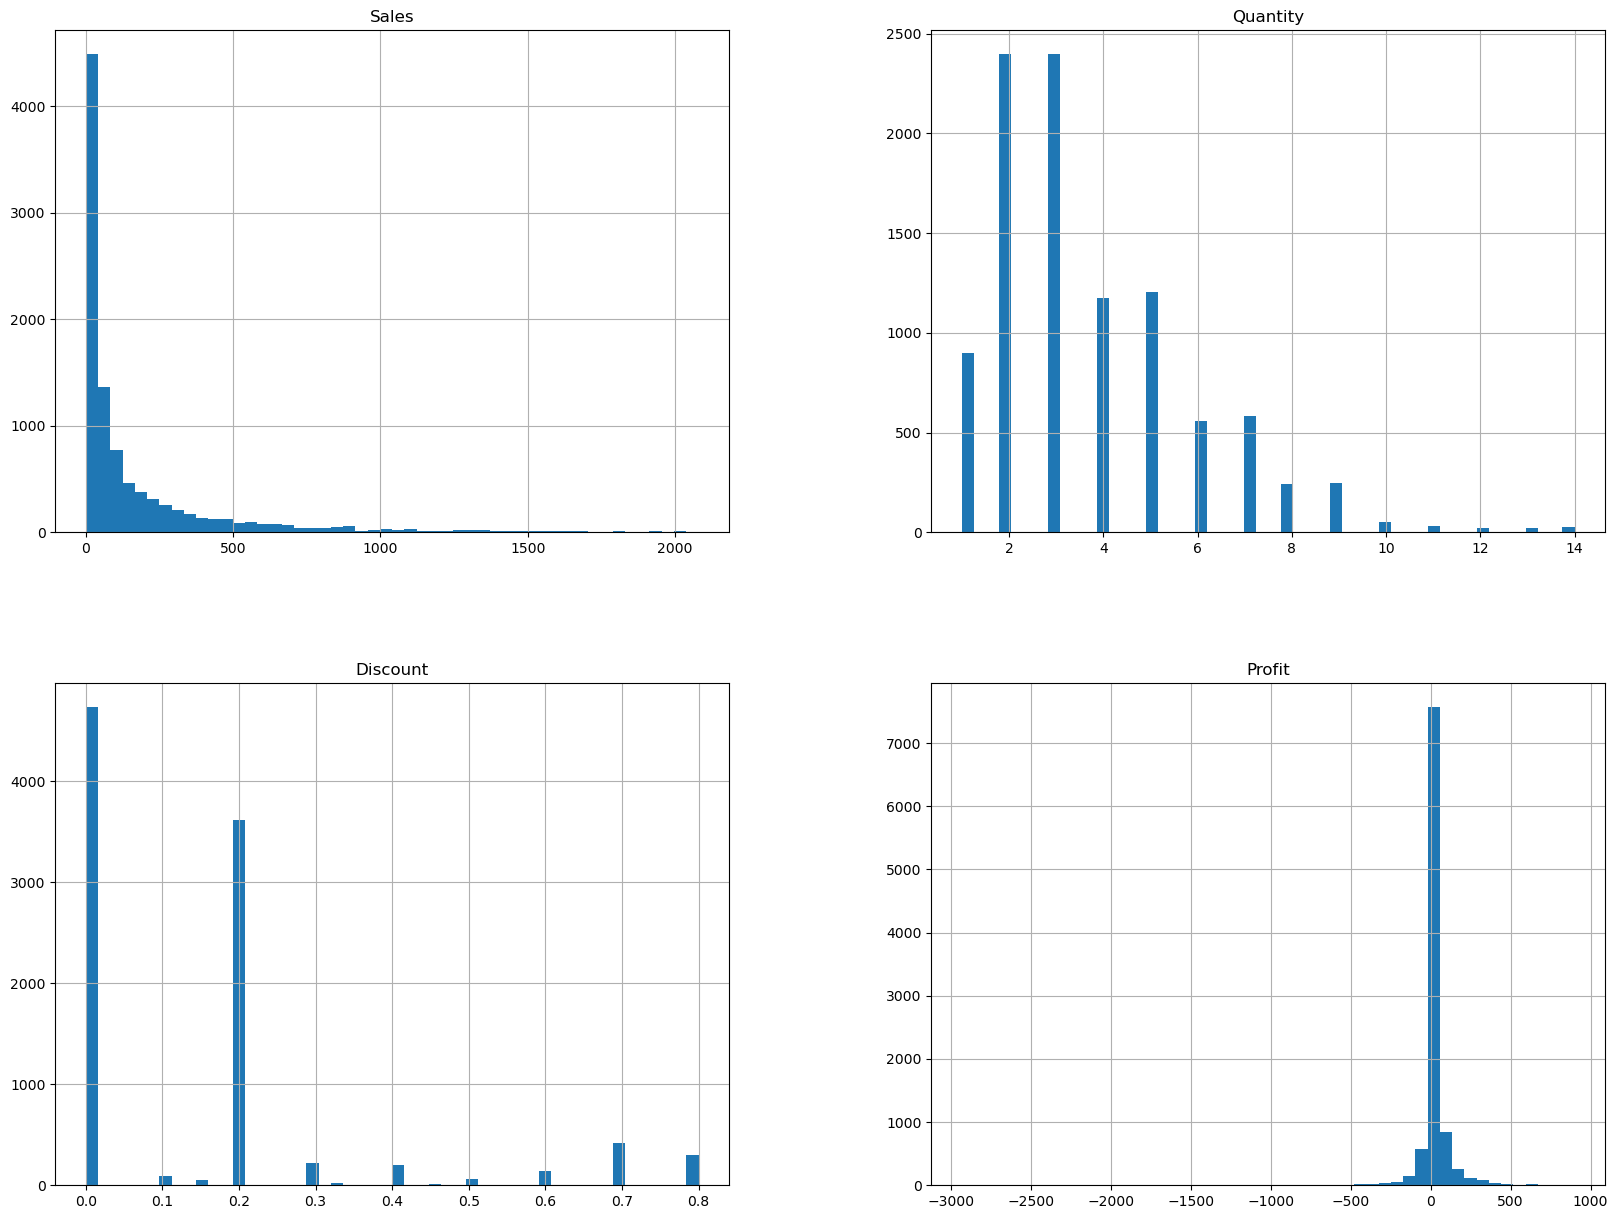

In [56]:
new_dt.hist(bins=50,figsize=(20,15))
plt.show()

In [57]:
Gp1 = new_dt.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =new_dt.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge1= pd.merge(Gp1, Gp2, how='right',on='Category')
merge1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge1

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,944.80,90263.5534
1,Technology,235.40,86961.0770
2,Furniture,364.42,14210.0055


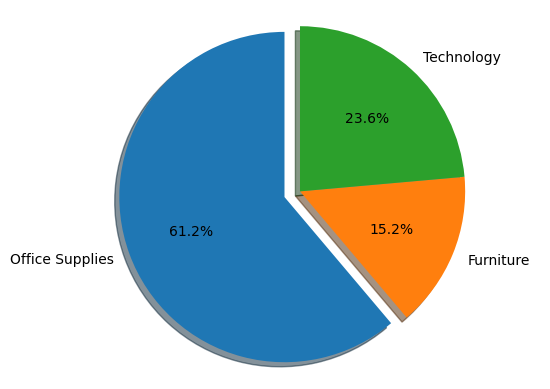

In [58]:
Category = 'Office Supplies','Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge1["Overall_Discount"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

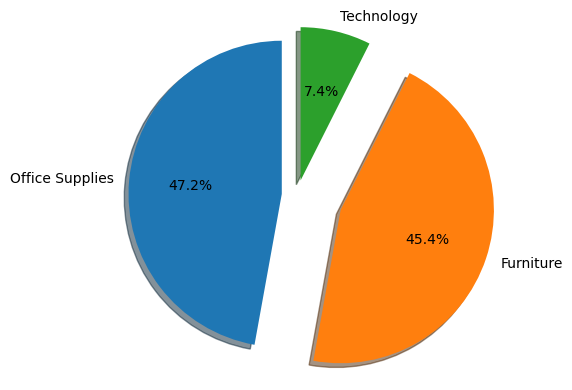

In [59]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.3,0.1)#It"explode" the 1st slice
ax1.pie(merge1["Overall_Profit"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### COMPARING DISCOUNT AND PROFIT DIAGRAMS ON THE BASIS OF 'REGION'

In [60]:
Gp3 = new_dt.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =new_dt.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge2= pd.merge(Gp3, Gp4, how='right',on='Region')
merge2.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge2

,Region,Overall_Discount,Overall_Profit
0,West,344.35,83951.7150
1,East,409.80,53824.9307
2,South,235.65,37838.8593
3,Central,554.82,15819.1309


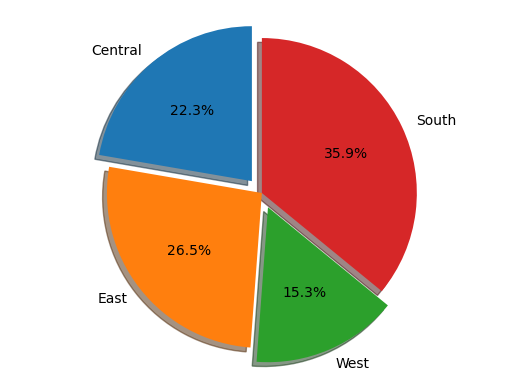

In [61]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge2["Overall_Discount"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

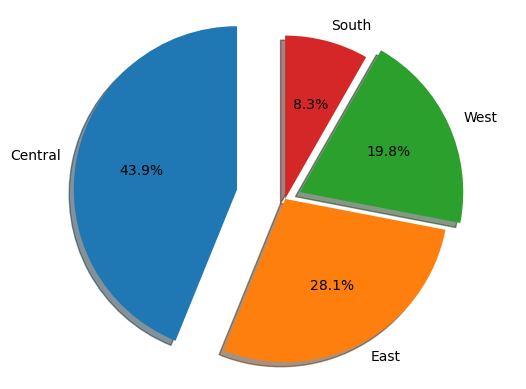

In [62]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.3,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge2["Overall_Profit"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the above two charts we can obseved a huge amount of loss in "central" Region beacause Company(store) is offering high Discount on Products in the Central Region but Outcome is very less.Now take a look at the percentage of "West" Region og Discount & Profit almost here Profit is double the Discount

#### COMPARING QUANTITY AND SALES DIAGRAMS ON THE BASIS OF 'CATEGORY'

In [63]:
Gp5 = new_dt.groupby(['Category']).Quantity.sum().sort_values(ascending = False).reset_index()
Gp6 =new_dt.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
merge3= pd.merge(Gp5, Gp6, how='right',on='Category')
merge3.rename(columns={'Quantity':'Total_Quantity','Sales':'Total_Sales'},inplace = True)
merge3

,Category,Total_Quantity,Total_Sales
0,Furniture,7775,644044.8807
1,Office Supplies,22735,594358.8600
2,Technology,6571,543164.3200


In [64]:
new_dt['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

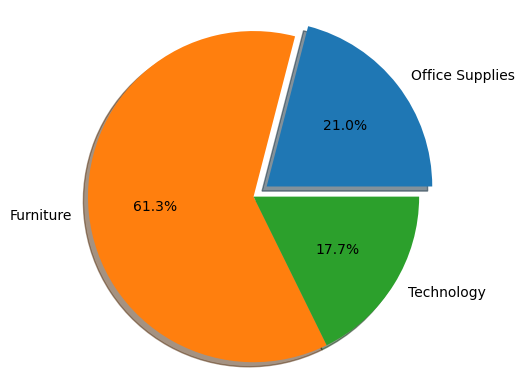

In [65]:
Category = 'Office Supplies', 'Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge3["Total_Quantity"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

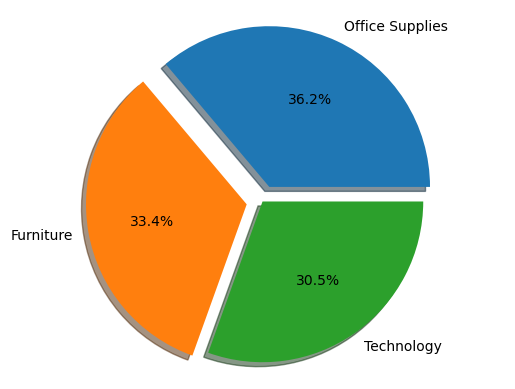

In [66]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.1,0)#It"explode" the 1st slice
ax1.pie(merge3["Total_Sales"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top 10 Profitable Cities.x

In [67]:
dt_top_10_cities = new_dt.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_cities.head(10)

,City,Profit
329,New York City,34897.5783
266,Los Angeles,24592.5499
452,Seattle,17581.2251
438,San Francisco,15678.3905
123,Detroit,6854.4448
94,Columbus,5132.7195
437,San Diego,4969.8885
407,Richmond,4872.7471
215,Jackson,4688.6484
93,Columbia,4335.1267


In [68]:
dt_top_10_cities = new_dt.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_cities.head(10)

,City,Discount
374,Philadelphia,174.10
207,Houston,141.82
80,Chicago,120.10
109,Dallas,56.30
266,Los Angeles,53.15
329,New York City,49.70
94,Columbus,38.50
216,Jacksonville,35.15
438,San Francisco,33.60
452,Seattle,27.00


## Top 10 Profitable Sub-Categories

In [74]:
dt_top_10_sub_categories = new_dt.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Profit
0,Accessories,39503.4923
13,Phones,37886.6451
12,Paper,34053.5693
5,Chairs,21989.2644
14,Storage,19864.5829
1,Appliances,14633.8139
6,Copiers,13974.6680
9,Furnishings,13059.1436
7,Envelopes,6964.1767
2,Art,6527.7870


In [70]:
dt_top_10_sub_categories = new_dt.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,564.40
13,Phones,136.20
9,Furnishings,132.40
5,Chairs,103.10
12,Paper,102.60
16,Tables,82.15
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


## Top 2 sales Region

In [77]:
dt_top_10_region = new_dt.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
dt_top_10_region.head(2)

,Region,Sales
3,West,592610.3555
1,East,506698.1940


## CONCLUSION

Correlation Matrix showing positive relationship between Profit & Sales, Quantity & Sales.
Company offering more Discount on Office Sppliers & furniture Category.
In the Central Rregion company(Store) giving lots of discount but the Output is very less in quantity. - Company Provides highest Quantity for Office Suppliers but Sales are not that much good enough,Quantity should be minimized and provide it to the Furniture category instead of Office Suppliers.

# Thank You!